<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/27_09_2020_Quize1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [197]:
weather = pd.read_csv("Question1/Plant_1_Weather_Sensor_Data.csv")
weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [198]:
generation = pd.read_csv("Question1/Plant_1_Generation_Data.csv",sep=',',error_bad_lines=False)
generation

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


# Clean Data

In [199]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [200]:
datetimeCorrect = generation.DATE_TIME.str.contains('^[0-9]*-[0-9]*-[0-9]* [0-9]*:[0-9]*$', regex=True)
generation = generation[datetimeCorrect == True]

In [201]:
datetimeCorrect

0        True
1        True
2        True
3        True
4        True
         ... 
68773    True
68774    True
68775    True
68776    True
68777    True
Name: DATE_TIME, Length: 68778, dtype: bool

In [202]:
generation['DATE_TIME'] = pd.to_datetime(generation['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [203]:
generation

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [204]:
generation.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [205]:
generation.PLANT_ID.unique()

array([4135001])

In [206]:
generation.SOURCE_KEY.unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [207]:
weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [208]:
weather.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [209]:
weather.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [210]:
weather.PLANT_ID.unique()

array([4135001])

In [211]:
weather.SOURCE_KEY.unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [212]:
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'])

In [213]:
len(weather.DATE_TIME.unique())

3182

In [214]:
len(generation.DATE_TIME.unique())

3158

In [215]:
print(len(generation))

68778


In [216]:
merg_data = pd.merge(generation, weather, on='DATE_TIME')
merg_data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [217]:
merg_data.describe()

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774.0,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.0,68774.000000,68774.000000,68774.000000
mean,4135001.0,3147.177450,307.778375,3295.834644,6.978728e+06,4135001.0,25.558521,31.244997,0.232305
std,0.0,4036.441826,394.394865,3145.220597,4.162707e+05,0.0,3.361300,12.308283,0.301948
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,0.000000,0.000000,0.000000,6.512007e+06,4135001.0,22.724491,21.123944,0.000000
50%,4135001.0,428.571429,41.450000,2658.473214,7.146685e+06,4135001.0,24.670178,24.818984,0.031620
75%,4135001.0,6365.468750,623.561161,6274.000000,7.268751e+06,4135001.0,27.960429,41.693659,0.454880
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,4135001.0,35.252486,65.545714,1.221652


In [218]:
merg_data.isna().sum()

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [219]:
merg_data = merg_data.drop(['PLANT_ID_x','PLANT_ID_y','SOURCE_KEY_y'],axis=1)

In [220]:
merg_data

,DATE_TIME,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [221]:
data_clean = merg_data.rename(columns = { 'SOURCE_KEY_x': 'SOURCE_KEY'}, inplace = False)

In [222]:
data_clean

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


# Analysis

In [223]:
print(f'min datetime: {data_clean.DATE_TIME.min()}')
print(f'max datetime: {data_clean.DATE_TIME.max()}')

min datetime: 2020-05-15 00:00:00
max datetime: 2020-06-17 23:45:00


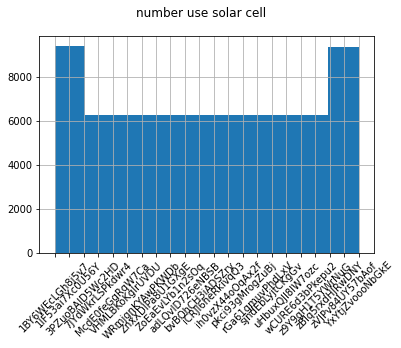

In [224]:
data_clean['SOURCE_KEY'].hist()
plt.suptitle('number use solar cell')
plt.xticks(rotation=45)
plt.show()

In [225]:
source_key = data_clean[['SOURCE_KEY','TOTAL_YIELD']].groupby("SOURCE_KEY").mean()
source_key

,TOTAL_YIELD
SOURCE_KEY,
1BY6WEcLGh8j5v7,6.377464e+06
1IF53ai7Xc0U56Y,6.313081e+06
3PZuoBAID5Wc2HD,7.117013e+06
7JYdWkrLSPkdwr4,7.728914e+06
McdE0feGgRqW7Ca,7.287580e+06
VHMLBKoKgIrUVDU,7.335465e+06
WRmjgnKYAwPKWDb,7.155458e+06
YxYtjZvoooNbGkE,7.307357e+06
ZnxXDlPa8U1GXgE,6.650663e+06


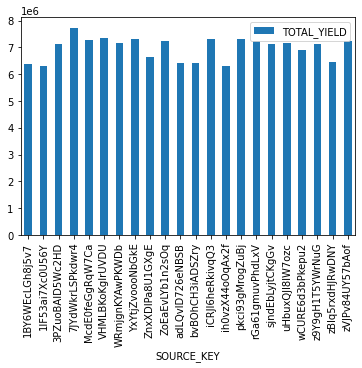

In [226]:
source_key.plot.bar()

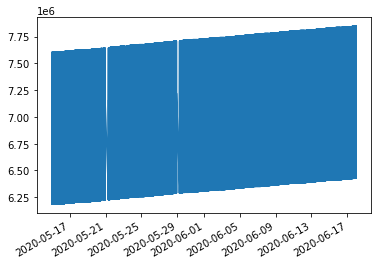

In [227]:
plt.plot(data_clean['DATE_TIME'],data_clean['TOTAL_YIELD'])
plt.gcf().autofmt_xdate()

plt.show()

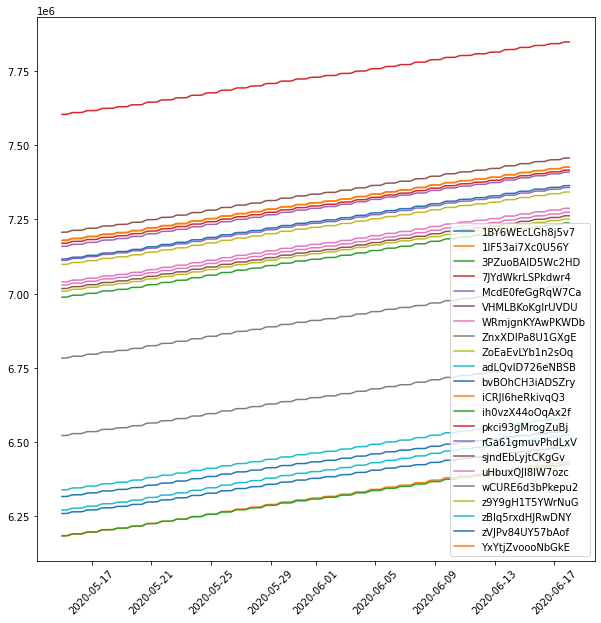

In [228]:
solar_cell = data_clean['SOURCE_KEY'].unique()
plt.figure(figsize=(10,10))
for t in solar_cell:
  cell = (data_clean['SOURCE_KEY'] == t)
  df_cell = data_clean[cell]
  plt.plot(df_cell['DATE_TIME'],df_cell['TOTAL_YIELD'])
plt.legend(solar_cell)
plt.xticks(rotation=45)

plt.show()

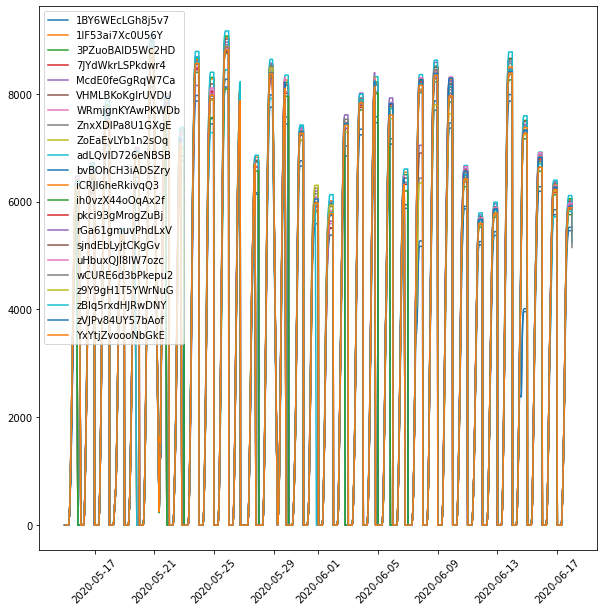

In [230]:
solar_cell = data_clean['SOURCE_KEY'].unique()
plt.figure(figsize=(10,10))
for t in solar_cell:
  cell = (data_clean['SOURCE_KEY'] == t)
  df_cell = data_clean[cell]
  plt.plot(df_cell['DATE_TIME'],df_cell['DAILY_YIELD'])
plt.legend(solar_cell)
plt.xticks(rotation=45)

plt.show()

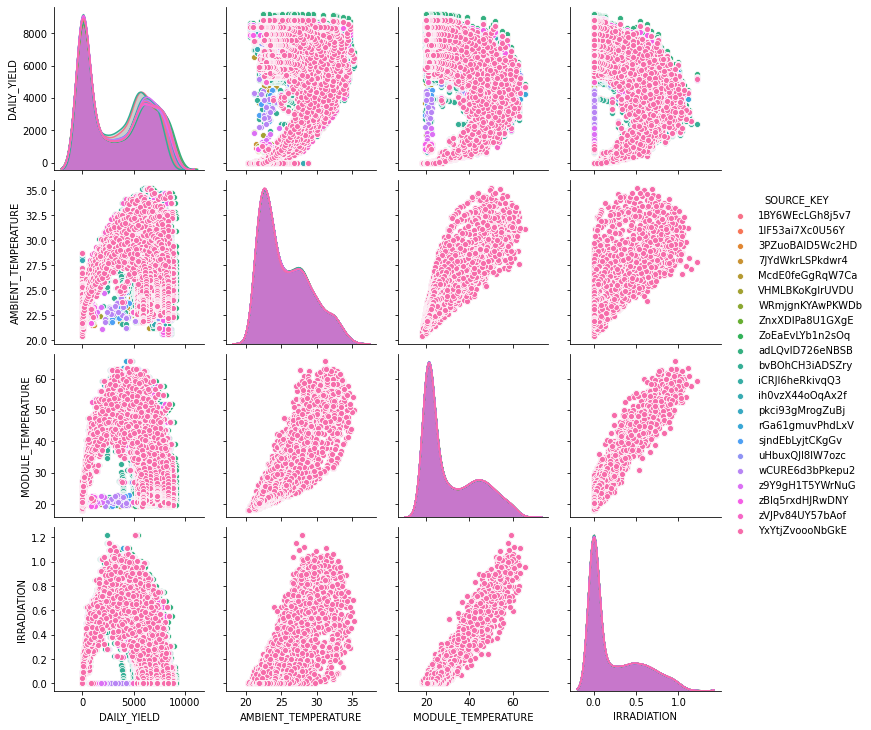

In [231]:
sns.pairplot(data_clean,hue='SOURCE_KEY',vars=['DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION'])

In [244]:
window_past = 3
before_date = 3
data = data_clean.copy()
data_result = data.copy()
date = data_clean['DATE_TIME']
date = date + np.timedelta64(before_date,'D')
for t in range(window_past):
    date = date + np.timedelta64(1,'D')
    p = data.copy()
    p['DATE_TIME'] = date
    data_result = pd.merge(data_result,p, on=["DATE_TIME", "SOURCE_KEY"], how="left",suffixes=("",f"_past{t}"))
    data = p
data_result.tail()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_past0,AC_POWER_past0,DAILY_YIELD_past0,TOTAL_YIELD_past0,AMBIENT_TEMPERATURE_past0,MODULE_TEMPERATURE_past0,IRRADIATION_past0,DC_POWER_past1,AC_POWER_past1,DAILY_YIELD_past1,TOTAL_YIELD_past1,AMBIENT_TEMPERATURE_past1,MODULE_TEMPERATURE_past1,IRRADIATION_past1,DC_POWER_past2,AC_POWER_past2,DAILY_YIELD_past2,TOTAL_YIELD_past2,AMBIENT_TEMPERATURE_past2,MODULE_TEMPERATURE_past2,IRRADIATION_past2
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,0.0,0.0,7382.375,7260531.0,22.205029,20.459212,0.0,0.0,0.0,5888.00,7252094.0,21.82054,19.340356,0.0,0.0,0.0,4985.750000,7246206.0,22.883351,20.635208,0.0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,0.0,0.0,4230.500,7002369.0,22.205029,20.459212,0.0,0.0,0.0,2195.25,6993908.0,21.82054,19.340356,0.0,0.0,0.0,2421.857143,6988054.0,22.883351,20.635208,0.0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,0.0,0.0,8363.000,7225230.0,22.205029,20.459212,0.0,0.0,0.0,5803.00,7216867.0,21.82054,19.340356,0.0,0.0,0.0,5599.000000,7211064.0,22.883351,20.635208,0.0
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,0.0,0.0,8435.000,6557822.0,22.205029,20.459212,0.0,0.0,0.0,5837.00,6549387.0,21.82054,19.340356,0.0,0.0,0.0,5647.000000,6543550.0,22.883351,20.635208,0.0
68773,2020-06-17 23:45:00,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0,21.909288,20.427972,0.0,0.0,0.0,8410.000,7336960.0,22.205029,20.459212,0.0,0.0,0.0,5863.00,7328550.0,21.82054,19.340356,0.0,0.0,0.0,4962.125000,7322687.0,22.883351,20.635208,0.0


In [245]:
data_result.isna().sum()

DATE_TIME                        0
SOURCE_KEY                       0
DC_POWER                         0
AC_POWER                         0
DAILY_YIELD                      0
TOTAL_YIELD                      0
AMBIENT_TEMPERATURE              0
MODULE_TEMPERATURE               0
IRRADIATION                      0
DC_POWER_past0               10942
AC_POWER_past0               10942
DAILY_YIELD_past0            10942
TOTAL_YIELD_past0            10942
AMBIENT_TEMPERATURE_past0    10942
MODULE_TEMPERATURE_past0     10942
IRRADIATION_past0            10942
DC_POWER_past1               12809
AC_POWER_past1               12809
DAILY_YIELD_past1            12809
TOTAL_YIELD_past1            12809
AMBIENT_TEMPERATURE_past1    12809
MODULE_TEMPERATURE_past1     12809
IRRADIATION_past1            12809
DC_POWER_past2               14555
AC_POWER_past2               14555
DAILY_YIELD_past2            14555
TOTAL_YIELD_past2            14555
AMBIENT_TEMPERATURE_past2    14555
MODULE_TEMPERATURE_p

In [246]:
data_result.dropna(axis=0,inplace=True)

In [247]:
data_result.isna().sum()

DATE_TIME                    0
SOURCE_KEY                   0
DC_POWER                     0
AC_POWER                     0
DAILY_YIELD                  0
TOTAL_YIELD                  0
AMBIENT_TEMPERATURE          0
MODULE_TEMPERATURE           0
IRRADIATION                  0
DC_POWER_past0               0
AC_POWER_past0               0
DAILY_YIELD_past0            0
TOTAL_YIELD_past0            0
AMBIENT_TEMPERATURE_past0    0
MODULE_TEMPERATURE_past0     0
IRRADIATION_past0            0
DC_POWER_past1               0
AC_POWER_past1               0
DAILY_YIELD_past1            0
TOTAL_YIELD_past1            0
AMBIENT_TEMPERATURE_past1    0
MODULE_TEMPERATURE_past1     0
IRRADIATION_past1            0
DC_POWER_past2               0
AC_POWER_past2               0
DAILY_YIELD_past2            0
TOTAL_YIELD_past2            0
AMBIENT_TEMPERATURE_past2    0
MODULE_TEMPERATURE_past2     0
IRRADIATION_past2            0
dtype: int64

In [248]:
data_result

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_past0,AC_POWER_past0,DAILY_YIELD_past0,TOTAL_YIELD_past0,AMBIENT_TEMPERATURE_past0,MODULE_TEMPERATURE_past0,IRRADIATION_past0,DC_POWER_past1,AC_POWER_past1,DAILY_YIELD_past1,TOTAL_YIELD_past1,AMBIENT_TEMPERATURE_past1,MODULE_TEMPERATURE_past1,IRRADIATION_past1,DC_POWER_past2,AC_POWER_past2,DAILY_YIELD_past2,TOTAL_YIELD_past2,AMBIENT_TEMPERATURE_past2,MODULE_TEMPERATURE_past2,IRRADIATION_past2
11774,2020-05-21 07:45:00,1BY6WEcLGh8j5v7,3946.25,387.775,296.250,6298642.25,23.530554,30.403243,0.322396,4089.250000,401.487500,234.000000,6271839.000,24.331877,30.978355,0.322465,3222.000000,316.500000,223.625000,6265536.625,23.388554,27.937476,0.243643,1877.875000,184.062500,206.375000,6259765.375,25.216180,29.547111,0.144793
11775,2020-05-21 07:45:00,1IF53ai7Xc0U56Y,3553.40,348.880,343.200,6225770.20,23.530554,30.403243,0.322396,4601.250000,451.487500,264.750000,6196858.750,24.331877,30.978355,0.322465,3546.750000,348.525000,243.375000,6190245.375,23.388554,27.937476,0.243643,2142.714286,210.071429,233.714286,6183878.714,25.216180,29.547111,0.144793
11776,2020-05-21 07:45:00,3PZuoBAID5Wc2HD,3534.60,347.020,342.200,7029836.20,23.530554,30.403243,0.322396,4571.125000,448.612500,260.750000,7000949.750,24.331877,30.978355,0.322465,3509.000000,344.837500,241.500000,6994274.500,23.388554,27.937476,0.243643,2122.857143,208.114286,231.285714,6987990.286,25.216180,29.547111,0.144793
11777,2020-05-21 07:45:00,7JYdWkrLSPkdwr4,3403.80,334.280,328.800,7644308.80,23.530554,30.403243,0.322396,4335.285714,425.557143,249.142857,7615786.143,24.331877,30.978355,0.322465,3427.571429,336.842857,238.714286,7609314.714,23.388554,27.937476,0.243643,2048.142857,200.785714,223.857143,7603183.857,25.216180,29.547111,0.144793
11778,2020-05-21 07:45:00,McdE0feGgRqW7Ca,3339.80,328.120,315.600,7201377.60,23.530554,30.403243,0.322396,4274.714286,419.614286,244.428571,7172265.429,24.331877,30.978355,0.322465,3466.428571,340.771429,241.714286,7165676.714,23.388554,27.937476,0.243643,2121.000000,207.957143,229.571429,7159193.571,25.216180,29.547111,0.144793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.00,0.000,5967.000,7287002.00,21.909288,20.427972,0.000000,0.000000,0.000000,7382.375000,7260531.000,22.205029,20.459212,0.000000,0.000000,0.000000,5888.000000,7252094.000,21.820540,19.340356,0.000000,0.000000,0.000000,4985.750000,7246206.000,22.883351,20.635208,0.000000
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.00,0.000,5147.625,7028601.00,21.909288,20.427972,0.000000,0.000000,0.000000,4230.500000,7002369.000,22.205029,20.459212,0.000000,0.000000,0.000000,2195.250000,6993908.000,21.820540,19.340356,0.000000,0.000000,0.000000,2421.857143,6988054.000,22.883351,20.635208,0.000000
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.00,0.000,5819.000,7251204.00,21.909288,20.427972,0.000000,0.000000,0.000000,8363.000000,7225230.000,22.205029,20.459212,0.000000,0.000000,0.000000,5803.000000,7216867.000,21.820540,19.340356,0.000000,0.000000,0.000000,5599.000000,7211064.000,22.883351,20.635208,0.000000
68772,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.00,0.000,5817.000,6583369.00,21.909288,20.427972,0.000000,0.000000,0.000000,8435.000000,6557822.000,22.205029,20.459212,0.000000,0.000000,0.000000,5837.000000,6549387.000,21.820540,19.340356,0.000000,0.000000,0.000000,5647.000000,6543550.000,22.883351,20.635208,0.000000


In [249]:
df_one_hot = pd.get_dummies(data_result.SOURCE_KEY, prefix='source')
df_one_hot

,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
11774,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11775,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11776,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11777,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11778,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68772,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [250]:
data_process = pd.concat([data_result,df_one_hot], axis=1)

In [251]:
data_process

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_past0,AC_POWER_past0,DAILY_YIELD_past0,TOTAL_YIELD_past0,AMBIENT_TEMPERATURE_past0,MODULE_TEMPERATURE_past0,IRRADIATION_past0,DC_POWER_past1,AC_POWER_past1,DAILY_YIELD_past1,TOTAL_YIELD_past1,AMBIENT_TEMPERATURE_past1,MODULE_TEMPERATURE_past1,IRRADIATION_past1,DC_POWER_past2,AC_POWER_past2,DAILY_YIELD_past2,TOTAL_YIELD_past2,AMBIENT_TEMPERATURE_past2,MODULE_TEMPERATURE_past2,IRRADIATION_past2,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
11774,2020-05-21 07:45:00,1BY6WEcLGh8j5v7,3946.25,387.775,296.250,6298642.25,23.530554,30.403243,0.322396,4089.250000,401.487500,234.000000,6271839.000,24.331877,30.978355,0.322465,3222.000000,316.500000,223.625000,6265536.625,23.388554,27.937476,0.243643,1877.875000,184.062500,206.375000,6259765.375,25.216180,29.547111,0.144793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11775,2020-05-21 07:45:00,1IF53ai7Xc0U56Y,3553.40,348.880,343.200,6225770.20,23.530554,30.403243,0.322396,4601.250000,451.487500,264.750000,6196858.750,24.331877,30.978355,0.322465,3546.750000,348.525000,243.375000,6190245.375,23.388554,27.937476,0.243643,2142.714286,210.071429,233.714286,6183878.714,25.216180,29.547111,0.144793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11776,2020-05-21 07:45:00,3PZuoBAID5Wc2HD,3534.60,347.020,342.200,7029836.20,23.530554,30.403243,0.322396,4571.125000,448.612500,260.750000,7000949.750,24.331877,30.978355,0.322465,3509.000000,344.837500,241.500000,6994274.500,23.388554,27.937476,0.243643,2122.857143,208.114286,231.285714,6987990.286,25.216180,29.547111,0.144793,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11777,2020-05-21 07:45:00,7JYdWkrLSPkdwr4,3403.80,334.280,328.800,7644308.80,23.530554,30.403243,0.322396,4335.285714,425.557143,249.142857,7615786.143,24.331877,30.978355,0.322465,3427.571429,336.842857,238.714286,7609314.714,23.388554,27.937476,0.243643,2048.142857,200.785714,223.857143,7603183.857,25.216180,29.547111,0.144793,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11778,2020-05-21 07:45:00,McdE0feGgRqW7Ca,3339.80,328.120,315.600,7201377.60,23.530554,30.403243,0.322396,4274.714286,419.614286,244.428571,7172265.429,24.331877,30.978355,0.322465,3466.428571,340.771429,241.714286,7165676.714,23.388554,27.937476,0.243643,2121.000000,207.957143,229.571429,7159193.571,25.216180,29.547111,0.144793,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.00,0.000,5967.000,7287002.00,21.909288,20.427972,0.000000,0.000000,0.000000,7382.375000,7260531.000,22.205029,20.459212,0.000000,0.000000,0.000000,5888.000000,7252094.000,21.820540,19.340356,0.000000,0.000000,0.000000,4985.750000,7246206.000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.00,0.000,5147.625,7028601.00,21.909288,20.427972,0.000000,0.000000,0.000000,4230.500000,7002369.000,22.205029,20.459212,0.000000,0.000000,0.000000,2195.250000,6993908.000,21.820540,19.340356,0.000000,0.000000,0.000000,2421.857143,6988054.000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.00,0.000,5819.000,7251204.00,21.909288,20.427972,0.000000,0.000000,0.000000,8363.000000,7225230.000,22.205029,20.459212,0.000

In [252]:
data_process = data_process.drop(['SOURCE_KEY'],axis=1)

In [253]:
data_process

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_past0,AC_POWER_past0,DAILY_YIELD_past0,TOTAL_YIELD_past0,AMBIENT_TEMPERATURE_past0,MODULE_TEMPERATURE_past0,IRRADIATION_past0,DC_POWER_past1,AC_POWER_past1,DAILY_YIELD_past1,TOTAL_YIELD_past1,AMBIENT_TEMPERATURE_past1,MODULE_TEMPERATURE_past1,IRRADIATION_past1,DC_POWER_past2,AC_POWER_past2,DAILY_YIELD_past2,TOTAL_YIELD_past2,AMBIENT_TEMPERATURE_past2,MODULE_TEMPERATURE_past2,IRRADIATION_past2,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
11774,2020-05-21 07:45:00,3946.25,387.775,296.250,6298642.25,23.530554,30.403243,0.322396,4089.250000,401.487500,234.000000,6271839.000,24.331877,30.978355,0.322465,3222.000000,316.500000,223.625000,6265536.625,23.388554,27.937476,0.243643,1877.875000,184.062500,206.375000,6259765.375,25.216180,29.547111,0.144793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11775,2020-05-21 07:45:00,3553.40,348.880,343.200,6225770.20,23.530554,30.403243,0.322396,4601.250000,451.487500,264.750000,6196858.750,24.331877,30.978355,0.322465,3546.750000,348.525000,243.375000,6190245.375,23.388554,27.937476,0.243643,2142.714286,210.071429,233.714286,6183878.714,25.216180,29.547111,0.144793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11776,2020-05-21 07:45:00,3534.60,347.020,342.200,7029836.20,23.530554,30.403243,0.322396,4571.125000,448.612500,260.750000,7000949.750,24.331877,30.978355,0.322465,3509.000000,344.837500,241.500000,6994274.500,23.388554,27.937476,0.243643,2122.857143,208.114286,231.285714,6987990.286,25.216180,29.547111,0.144793,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11777,2020-05-21 07:45:00,3403.80,334.280,328.800,7644308.80,23.530554,30.403243,0.322396,4335.285714,425.557143,249.142857,7615786.143,24.331877,30.978355,0.322465,3427.571429,336.842857,238.714286,7609314.714,23.388554,27.937476,0.243643,2048.142857,200.785714,223.857143,7603183.857,25.216180,29.547111,0.144793,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11778,2020-05-21 07:45:00,3339.80,328.120,315.600,7201377.60,23.530554,30.403243,0.322396,4274.714286,419.614286,244.428571,7172265.429,24.331877,30.978355,0.322465,3466.428571,340.771429,241.714286,7165676.714,23.388554,27.937476,0.243643,2121.000000,207.957143,229.571429,7159193.571,25.216180,29.547111,0.144793,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,0.00,0.000,5967.000,7287002.00,21.909288,20.427972,0.000000,0.000000,0.000000,7382.375000,7260531.000,22.205029,20.459212,0.000000,0.000000,0.000000,5888.000000,7252094.000,21.820540,19.340356,0.000000,0.000000,0.000000,4985.750000,7246206.000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68770,2020-06-17 23:45:00,0.00,0.000,5147.625,7028601.00,21.909288,20.427972,0.000000,0.000000,0.000000,4230.500000,7002369.000,22.205029,20.459212,0.000000,0.000000,0.000000,2195.250000,6993908.000,21.820540,19.340356,0.000000,0.000000,0.000000,2421.857143,6988054.000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
68771,2020-06-17 23:45:00,0.00,0.000,5819.000,7251204.00,21.909288,20.427972,0.000000,0.000000,0.000000,8363.000000,7225230.000,22.205029,20.459212,0.000000,0.000000,0.000000,5803.000000,7216867.000,21.820540,19.340356,0.000000,0.000000,0.000000,5599.000000,7211064.000,22.883351,20.635208,0.0000

In [254]:
data_process = data_process.reset_index(drop=True)
y_data = data_process['TOTAL_YIELD']
y_data

0        6298642.25
1        6225770.20
2        7029836.20
3        7644308.80
4        7201377.60
            ...    
49438    7287002.00
49439    7028601.00
49440    7251204.00
49441    6583369.00
49442    7363272.00
Name: TOTAL_YIELD, Length: 49443, dtype: float64

# Train

In [255]:
x_data = data_process.drop(['DATE_TIME','TOTAL_YIELD','TOTAL_YIELD_past0','TOTAL_YIELD_past1','TOTAL_YIELD_past2'],axis = 1)

In [256]:
x_data

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_past0,AC_POWER_past0,DAILY_YIELD_past0,AMBIENT_TEMPERATURE_past0,MODULE_TEMPERATURE_past0,IRRADIATION_past0,DC_POWER_past1,AC_POWER_past1,DAILY_YIELD_past1,AMBIENT_TEMPERATURE_past1,MODULE_TEMPERATURE_past1,IRRADIATION_past1,DC_POWER_past2,AC_POWER_past2,DAILY_YIELD_past2,AMBIENT_TEMPERATURE_past2,MODULE_TEMPERATURE_past2,IRRADIATION_past2,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
0,3946.25,387.775,296.250,23.530554,30.403243,0.322396,4089.250000,401.487500,234.000000,24.331877,30.978355,0.322465,3222.000000,316.500000,223.625000,23.388554,27.937476,0.243643,1877.875000,184.062500,206.375000,25.216180,29.547111,0.144793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3553.40,348.880,343.200,23.530554,30.403243,0.322396,4601.250000,451.487500,264.750000,24.331877,30.978355,0.322465,3546.750000,348.525000,243.375000,23.388554,27.937476,0.243643,2142.714286,210.071429,233.714286,25.216180,29.547111,0.144793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3534.60,347.020,342.200,23.530554,30.403243,0.322396,4571.125000,448.612500,260.750000,24.331877,30.978355,0.322465,3509.000000,344.837500,241.500000,23.388554,27.937476,0.243643,2122.857143,208.114286,231.285714,25.216180,29.547111,0.144793,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3403.80,334.280,328.800,23.530554,30.403243,0.322396,4335.285714,425.557143,249.142857,24.331877,30.978355,0.322465,3427.571429,336.842857,238.714286,23.388554,27.937476,0.243643,2048.142857,200.785714,223.857143,25.216180,29.547111,0.144793,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3339.80,328.120,315.600,23.530554,30.403243,0.322396,4274.714286,419.614286,244.428571,24.331877,30.978355,0.322465,3466.428571,340.771429,241.714286,23.388554,27.937476,0.243643,2121.000000,207.957143,229.571429,25.216180,29.547111,0.144793,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49438,0.00,0.000,5967.000,21.909288,20.427972,0.000000,0.000000,0.000000,7382.375000,22.205029,20.459212,0.000000,0.000000,0.000000,5888.000000,21.820540,19.340356,0.000000,0.000000,0.000000,4985.750000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49439,0.00,0.000,5147.625,21.909288,20.427972,0.000000,0.000000,0.000000,4230.500000,22.205029,20.459212,0.000000,0.000000,0.000000,2195.250000,21.820540,19.340356,0.000000,0.000000,0.000000,2421.857143,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49440,0.00,0.000,5819.000,21.909288,20.427972,0.000000,0.000000,0.000000,8363.000000,22.205029,20.459212,0.000000,0.000000,0.000000,5803.000000,21.820540,19.340356,0.000000,0.000000,0.000000,5599.000000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
49441,0.00,0.000,5817.000,21.909288,20.427972,0.000000,0.000000,0.000000,8435.000000,22.205029,20.459212,0.000000,0.000000,0.000000,5837.000000,21.820540,19.340356,0.000000,0.000000,0.000000,5647.000000,22.883351,20.635208,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [257]:
# normalize
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)

In [258]:
x_normalize.loc[:,:]

,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_past0,AC_POWER_past0,DAILY_YIELD_past0,AMBIENT_TEMPERATURE_past0,MODULE_TEMPERATURE_past0,IRRADIATION_past0,DC_POWER_past1,AC_POWER_past1,DAILY_YIELD_past1,AMBIENT_TEMPERATURE_past1,MODULE_TEMPERATURE_past1,IRRADIATION_past1,DC_POWER_past2,AC_POWER_past2,DAILY_YIELD_past2,AMBIENT_TEMPERATURE_past2,MODULE_TEMPERATURE_past2,IRRADIATION_past2,source_1BY6WEcLGh8j5v7,source_1IF53ai7Xc0U56Y,source_3PZuoBAID5Wc2HD,source_7JYdWkrLSPkdwr4,source_McdE0feGgRqW7Ca,source_VHMLBKoKgIrUVDU,source_WRmjgnKYAwPKWDb,source_YxYtjZvoooNbGkE,source_ZnxXDlPa8U1GXgE,source_ZoEaEvLYb1n2sOq,source_adLQvlD726eNBSB,source_bvBOhCH3iADSZry,source_iCRJl6heRkivqQ3,source_ih0vzX44oOqAx2f,source_pkci93gMrogZuBj,source_rGa61gmuvPhdLxV,source_sjndEbLyjtCKgGv,source_uHbuxQJl8lW7ozc,source_wCURE6d3bPkepu2,source_z9Y9gH1T5YWrNuG,source_zBIq5rxdHJRwDNY,source_zVJPv84UY57bAof
0,0.272698,0.274833,0.032331,0.23445,0.258681,0.263902,0.283711,0.285695,0.025537,0.264803,0.270812,0.280136,0.223542,0.225219,0.024405,0.201296,0.206666,0.21166,0.130286,0.130977,0.022523,0.324336,0.240621,0.125787,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.245551,0.247266,0.037455,0.23445,0.258681,0.263902,0.319234,0.321275,0.028893,0.264803,0.270812,0.280136,0.246073,0.248008,0.026561,0.201296,0.206666,0.21166,0.148661,0.149485,0.025506,0.324336,0.240621,0.125787,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.244252,0.245948,0.037346,0.23445,0.258681,0.263902,0.317143,0.319229,0.028457,0.264803,0.270812,0.280136,0.243454,0.245384,0.026356,0.201296,0.206666,0.21166,0.147283,0.148092,0.025241,0.324336,0.240621,0.125787,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235213,0.236918,0.035883,0.23445,0.258681,0.263902,0.300781,0.302823,0.027190,0.264803,0.270812,0.280136,0.237804,0.239695,0.026052,0.201296,0.206666,0.21166,0.142100,0.142877,0.024431,0.324336,0.240621,0.125787,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.230791,0.232553,0.034443,0.23445,0.258681,0.263902,0.296579,0.298594,0.026676,0.264803,0.270812,0.280136,0.240500,0.242490,0.026379,0.201296,0.206666,0.21166,0.147154,0.147981,0.025054,0.324336,0.240621,0.125787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49438,0.000000,0.000000,0.651206,0.11309,0.048255,0.000000,0.000000,0.000000,0.805672,0.121619,0.048914,0.000000,0.000000,0.000000,0.642584,0.095734,0.025312,0.00000,0.000000,0.000000,0.544118,0.167285,0.052627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49439,0.000000,0.000000,0.561784,0.11309,0.048255,0.000000,0.000000,0.000000,0.461694,0.121619,0.048914,0.000000,0.000000,0.000000,0.239578,0.095734,0.025312,0.00000,0.000000,0.000000,0.264308,0.167285,0.052627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49440,0.000000,0.000000,0.635054,0.11309,0.048255,0.000000,0.000000,0.000000,0.912692,0.121619,0.048914,0.000000,0.000000,0.000000,0.633308,0.095734,0.025312,0.00000,0.000000,0.000000,0.611044,0.167285,0.052627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49441,0.000000,0.000000,0.634836,0.11309,0.048255,0.000000,0.000000,0.000000,0.920550,0.121619,0.048914,0.000000,0.000000,0.000000,0.637018,0.095734,0.025312,0.00000,0.000000,0.000000,0.616283,0.167285,0.052627,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [259]:
len(x_normalize.columns)

46

In [260]:
len(y_data)

49443

In [261]:
len(x_data)

49443

In [262]:
def get_ten_Fold():
  k = 10
  list_fold_input = []
  list_fold_label = []
  for i in range(k):
    list_fold_input.append([])
    list_fold_label.append([])
  
  for i,row in x_normalize.iterrows():
    index_list_fold = i % k
    #print(index_list_fold)
    list_fold_input[index_list_fold].append(np.array(x_data.loc[i,:]))
    list_fold_label[index_list_fold].append(np.array(y_data.loc[i]))
  return (list_fold_input,list_fold_label)

In [263]:
list_fold_input,list_fold_label = get_ten_Fold()


In [264]:
k = 10
for i in range(len(list_fold_input)):
  print(f"k={i}")
  print(f"input: {np.array(list_fold_input[i]).shape}")
  print(f"label: {np.array(list_fold_label[i]).shape}")
  print()

k=0
input: (4945, 46)
label: (4945,)

k=1
input: (4945, 46)
label: (4945,)

k=2
input: (4945, 46)
label: (4945,)

k=3
input: (4944, 46)
label: (4944,)

k=4
input: (4944, 46)
label: (4944,)

k=5
input: (4944, 46)
label: (4944,)

k=6
input: (4944, 46)
label: (4944,)

k=7
input: (4944, 46)
label: (4944,)

k=8
input: (4944, 46)
label: (4944,)

k=9
input: (4944, 46)
label: (4944,)



In [265]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn import metrics
import xgboost as xgb
import time

In [273]:
def get_ten_Fold(x_data,y_data):
  k = 10
  list_fold_input = []
  list_fold_label = []
  for i in range(k):
    list_fold_input.append([])
    list_fold_label.append([])
  
  for i,row in x_normalize.iterrows():
    index_list_fold = i % k
    #print(index_list_fold)
    list_fold_input[index_list_fold].append(np.array(x_data.loc[i,:]))
    list_fold_label[index_list_fold].append(np.array(y_data.loc[i]))
  return (list_fold_input,list_fold_label)

def getData(before_date,window_past = 3):
  data = data_clean.copy()
  data_result = data.copy()
  date = data_clean['DATE_TIME']
  date = date + np.timedelta64(before_date,'D')
  for t in range(window_past):
      date = date + np.timedelta64(1,'D')
      p = data.copy()
      p['DATE_TIME'] = date
      data_result = pd.merge(data_result,p, on=["DATE_TIME", "SOURCE_KEY"], how="left",suffixes=("",f"_past{t}"))
      data = p
  data_result.tail()
  data_result.dropna(axis=0,inplace=True)
  df_one_hot = pd.get_dummies(data_result.SOURCE_KEY, prefix='source')
  data_process = pd.concat([data_result,df_one_hot], axis=1)
  data_process = data_process.drop(['SOURCE_KEY'],axis=1)
  data_process = data_process.reset_index(drop=True)
  return data_process

def evaluate(model,x_test,y_test):
  pred = model.predict(x_test)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
  print(f'Root Mean Squared Error (RMSE): {rmse}')

  r2 = model.score(x_test, y_test)
  print(f'R2 : {r2}')
  return (rmse,r2)

def train(list_fold_input,list_fold_label,model):
  list_rmse = []
  list_r2 = []
  for index_test in range(len(list_fold_input)):
    start_train_time = time.time()
    for index_train,train_data in enumerate(list_fold_input):
      if index_train == index_test:
        continue
      x_train = np.array(list_fold_input[index_train])
      y_train = np.array(list_fold_label[index_train])
      model.fit(x_train,y_train)
    end_train_time = time.time()
    x_test = np.array(list_fold_input[index_test])
    y_test = np.array(list_fold_label[index_test])
    print(f"Fold #{index_test+1}---------------------------------------")
    rmse,r2 = evaluate(model,x_test,y_test)
    list_rmse.append(rmse)
    list_r2.append(r2)
  print('++++++ Average +++++++')
  rmse = np.mean(list_rmse)
  r2 = np.mean(list_r2)
  print(f'Average Root Mean Squared Error (RMSE): {rmse}')
  print(f'Average R2: {r2}')
  return (rmse,r2)

In [287]:
#ใช้ข้อมูลของวันก่อนหน้า 3 วันก่อนหน้า เพื่อทําการคาคคะเนค่า Yield (TOTAL_YIELD) โดยใช้ข้อมูลคอลัมน์อื่นที่ไม่
#ใช้ TOTAL_YIELD เป็น Input มาทํานาย

data_process = getData(3,3)
x_data = data_process.drop(['DATE_TIME','DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE'	,'IRRADIATION','TOTAL_YIELD','TOTAL_YIELD_past0','TOTAL_YIELD_past1','TOTAL_YIELD_past2'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 95811.51121371609
R2 : 0.9497853188387452
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 34123.711397650295
R2 : 0.9929148887682818
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 95747.17154265005
R2 : 0.9498885276181686
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 34338.74324233543
R2 : 0.992782172559479
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 95665.20446180063
R2 : 0.9496620448213735
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 34658.980914858876
R2 : 0.9925138059201868
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 95630.06007131816
R2 : 0.9497581604179367
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 34681.959353527425
R2 : 0.992541579155

In [288]:
#ใช้ข้อมูลของวันก่อนหน้า 3 วันก่อนหน้า เพื่อทําการคาคคะเนค่า Yield (TOTAL_YIELD) โดยใช้ข้อมูลคอลัมน์อื่นที่ไม่
#ใช้ TOTAL_YIELD เป็น Input มาทํานาย
#   o โดยลองทั้งการนําข้อมูลเฉพาะ 3 วันของ 3 วันก่อนหน้าก่อนหน้าทุกคอลัมน์รวมทั้งคอลัมน์TOTAL_YIELD
#     ของ 3 วันนั้น (ดูcomment ข้างล่าง)
x_data = data_process.drop(['DATE_TIME','DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE'	,'IRRADIATION','TOTAL_YIELD'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 1923.758715957159
R2 : 0.999979755990615
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 1384.0839695704608
R2 : 0.9999883437452712
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 1921.8659407946154
R2 : 0.9999798102269438
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 1389.115037569403
R2 : 0.9999881882532333
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 1919.2972479925277
R2 : 0.9999797384790579
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 1385.1057087045706
R2 : 0.9999880437402198
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 1919.0156352277886
R2 : 0.9999797682382687
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 1386.460462782088
R2 : 0.9999880805

In [289]:
#ใช้ข้อมูลของวันก่อนหน้า 3 วันก่อนหน้า เพื่อทําการคาคคะเนค่า Yield (TOTAL_YIELD) โดยใช้ข้อมูลคอลัมน์อื่นที่ไม่
#ใช้ TOTAL_YIELD เป็น Input มาทํานาย
#   o ลองรวมข้อมูลของวันปัจจุบันที่ไม่ใช้คอลัมน์TOTAL_YIELD เข้ากับข้อมูล 3 วัน ของ 7 วันก่อนหน้า

x_data = data_process.drop(['DATE_TIME','TOTAL_YIELD','TOTAL_YIELD_past0','TOTAL_YIELD_past1','TOTAL_YIELD_past2'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 92397.10008984072
R2 : 0.9533005236329809
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 33030.34570828004
R2 : 0.9933616462654316
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 92300.563690624
R2 : 0.9534313162063099
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 33158.78291591581
R2 : 0.9932696931504308
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 92214.525407543
R2 : 0.9532279686039153
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 33450.41243963755
R2 : 0.9930267945957785
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 92187.58481488962
R2 : 0.953310249862704
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 33415.70503752917
R2 : 0.993076257741574
Fol

In [290]:
# ใช้ข้อมูลของวันก่อนหน้า 7 วันก่อนหน้า เพื่อทําการคาคคะเนค่า Yield (TOTAL_YIELD) โดยใช้ข้อมูลคอลัมน์อื่นที่ไม่ใช้ TOTAL_YIELD เป็น Input มาทํานาย
data_process = getData(7,3)
x_data = data_process.drop(['DATE_TIME','DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE'	,'IRRADIATION','TOTAL_YIELD','TOTAL_YIELD_past0','TOTAL_YIELD_past1','TOTAL_YIELD_past2'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 48100.67542261746
R2 : 0.987762108895374
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 46233.47505166034
R2 : 0.9863564721119988
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 48079.67132822984
R2 : 0.9875591280802446
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 46395.86639056025
R2 : 0.9861999235391558
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 48134.907968297855
R2 : 0.9875323440411715
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 46460.76658483622
R2 : 0.9859972205711316
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 48191.28543473685
R2 : 0.9875386413928888
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 46289.9239808951
R2 : 0.986094092008090

In [291]:
# ใช้ข้อมูลของวันก่อนหน้า 7 วันก่อนหน้า เพื่อทําการคาคคะเนค่า Yield (TOTAL_YIELD) โดยใช้ข้อมูลคอลัมน์อื่นที่ไม่ใช้ TOTAL_YIELD เป็น Input มาทํานาย (ดูcomment ข้างล่าง)
#    o โดยลองทั้งการนําข้อมูลเฉพาะ 3 วันของ 7 วันก่อนหน้าทุกคอลัมน์รวมทั้งคอลัมน์TOTAL_YIELD ของ 3 วันนั้น

x_data = data_process.drop(['DATE_TIME','DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE'	,'IRRADIATION','TOTAL_YIELD'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 1669.920433073473
R2 : 0.9999852498718841
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 1345.8086892439812
R2 : 0.9999884394029535
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 1674.9701627376276
R2 : 0.9999849012154234
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 1342.8854715476355
R2 : 0.9999884388545498
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 1669.8550191953493
R2 : 0.9999849954819416
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 1357.7352940172689
R2 : 0.999988041637328
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 1670.183762118527
R2 : 0.9999850322373778
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 1351.3118641674282
R2 : 0.999988149

In [292]:
# ใช้ข้อมูลของวันก่อนหน้า 7 วันก่อนหน้า เพื่อทําการคาคคะเนค่า Yield (TOTAL_YIELD) โดยใช้ข้อมูลคอลัมน์อื่นที่ไม่ใช้ TOTAL_YIELD เป็น Input มาทํานาย (ดูcomment ข้างล่าง)
#     o ลองรวมข้อมูลของวันปัจจุบันที่ไม่ใช้คอลัมน์TOTAL_YIELD เข้ากับข้อมูล 3 วัน ของ 7 วันก่อนหน้า

x_data = data_process.drop(['DATE_TIME','TOTAL_YIELD','TOTAL_YIELD_past0','TOTAL_YIELD_past1','TOTAL_YIELD_past2'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 49506.63074712586
R2 : 0.9870362401734838
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 43475.49621263481
R2 : 0.9879356840336561
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 49418.496180749105
R2 : 0.986856625283857
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 43509.88946754877
R2 : 0.9878633486954608
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 49413.28049371927
R2 : 0.9868613152492809
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 43588.925994355006
R2 : 0.9876748037757773
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 49586.25061029817
R2 : 0.9868067766468215
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 43453.79146087732
R2 : 0.9877458901821

# เปรียบเทียบความถูกต้อง

In [293]:
# เปรียบเทียบความถูกต้อง
#    o โดยลองทั้งการนําข้อมูลเฉพาะ 7 วันก่อนหน้าทุกคอลัมน์รวมทั้งคอลัมน์TOTAL_YIELD ของ ของ 3 วันนั้น

x_data = data_process.drop(['DATE_TIME','DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE'	,'IRRADIATION','TOTAL_YIELD'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 1669.920433073473
R2 : 0.9999852498718841
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 1345.8086892439812
R2 : 0.9999884394029535
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 1674.9701627376276
R2 : 0.9999849012154234
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 1342.8854715476355
R2 : 0.9999884388545498
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 1669.8550191953493
R2 : 0.9999849954819416
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 1357.7352940172689
R2 : 0.999988041637328
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 1670.183762118527
R2 : 0.9999850322373778
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 1351.3118641674282
R2 : 0.999988149

In [294]:
# เปรียบเทียบความถูกต้อง
#    o โดยลองทั้งการนําข้อมูลเฉพาะ 7 วันก่อนหน้าทุกคอลัมน์รวมทั้งคอลัมน์TOTAL_YIELD ของ ของ 3 วันนั้น
#    o และลองรวมข้อมูลของวันปัจจุบันที่ไม่ใช้คอลัมน์TOTAL_YIELD เข้ากับข้อมูล 3 วัน ของ 7 วันก่อนหน้า
x_data = data_process.drop(['DATE_TIME','TOTAL_YIELD'],axis = 1)
min_max_scaler = preprocessing.MinMaxScaler()
x = x_data.values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
x_normalize = pd.DataFrame(x_scaled,columns=x_data.columns)
y_data = data_process['TOTAL_YIELD']

list_fold_input, list_fold_label = get_ten_Fold(x_normalize,y_data)

linear_regression = LinearRegression()
ridge = Ridge()
lasso = Lasso(tol=1e-1)

print("### process Linear regression ####")
linear_regression_rsme,linear_regression_r2 = train(list_fold_input, list_fold_label,linear_regression)
print()

print("### process Ridge ####")
ridge_rsme,ridge_r2 = train(list_fold_input, list_fold_label,ridge)
print()

print("### process Lasso ####")
lasso_rsme,lasso_r2 = train(list_fold_input, list_fold_label,lasso)
print()

print()
print()
print("###Sumary###")
print(f"Linear regression:")
print(f"      rmse: {linear_regression_rsme}")
print(f"      r2: {linear_regression_r2}")
print(f"Ridge:")
print(f"      rmse: {ridge_rsme}")
print(f"      r2: {ridge_r2}")
print(f"Lasso:")
print(f"      rmse: {lasso_rsme}")
print(f"      r2: {lasso_r2}")

### process Linear regression ####
Fold #1---------------------------------------
Root Mean Squared Error (RMSE): 1639.443539651638
R2 : 0.9999857833535098
Fold #2---------------------------------------
Root Mean Squared Error (RMSE): 1333.6743275222757
R2 : 0.9999886469332724
Fold #3---------------------------------------
Root Mean Squared Error (RMSE): 1646.5213868466456
R2 : 0.9999854097547861
Fold #4---------------------------------------
Root Mean Squared Error (RMSE): 1329.4842107621755
R2 : 0.9999886684509682
Fold #5---------------------------------------
Root Mean Squared Error (RMSE): 1638.4065816181687
R2 : 0.9999855553213108
Fold #6---------------------------------------
Root Mean Squared Error (RMSE): 1342.6994060454003
R2 : 0.9999883050303511
Fold #7---------------------------------------
Root Mean Squared Error (RMSE): 1637.4060325454452
R2 : 0.9999856139639257
Fold #8---------------------------------------
Root Mean Squared Error (RMSE): 1336.4095016273352
R2 : 0.9999884